In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

100%|██████████| 42.6M/42.6M [00:02<00:00, 15.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(path + "/olist_customers_dataset.csv")

In [ ]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
df.isnull()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
99436,False,False,False,False,False
99437,False,False,False,False,False
99438,False,False,False,False,False
99439,False,False,False,False,False


In [ ]:
# Carregando os três datasets
order_items = pd.read_csv(path+'/olist_order_items_dataset.csv')
orders = pd.read_csv(path+'/olist_orders_dataset.csv')
products = pd.read_csv(path+'/olist_products_dataset.csv')

In [ ]:
# Unindo os datasets em um único DataFrame
df_completo = (order_items
               .merge(orders, on='order_id', how='left')          # Junta itens do pedido com informações do pedido
               .merge(products, on='product_id', how='left'))     # Adiciona informações detalhadas dos produtos

In [ ]:
df=pd.read_csv(path+'/olist_customers_dataset.csv')

In [ ]:
df_completo.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [ ]:
df_completo

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-05-10 22:56:40,2018-05-18 00:00:00,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,2018-07-23 20:31:55,2018-08-01 00:00:00,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-10-28 12:22:22,2017-11-10 00:00:00,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,2017-08-16 21:59:40,2017-08-25 00:00:00,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
df_completo.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


In [ ]:
df_completo.to_csv('df_completo.csv', index=False)

In [ ]:
df_completo.to_parquet('df_completo.parquet', index=False)

In [ ]:
df_completo.to_feather('df_completo.feather')

In [ ]:
df_completo.to_pickle('df_completo.pkl')

In [ ]:
df_completo.to_hdf('df_completo.h5', key='df', mode='w')

/tmp/ipython-input-2499826020.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['order_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_category_name'],
      dtype='object')]

  df_completo.to_hdf('df_completo.h5', key='df', mode='w')


In [ ]:
dados_dict = {
    'order_id': list(range(1, 101)),
    'product_id': list(range(1, 101)),
    'price': np.random.uniform(10, 500, 100).round(2),
    'freight_value': np.random.uniform(5, 50, 100).round(2),
    'order_status': np.random.choice(['entregue', 'enviado', 'cancelado'], 100),
    'product_category': np.random.choice(['eletrônicos', 'móveis', 'livros', 'roupas'], 100)
}

In [ ]:
df = pd.DataFrame(dados_dict)

print(" DATAFRAME CRIADO COM SUCESSO!")
print(f"\nShape: {df.shape}")
print(f"\nPrimeiras 5 linhas:")
print(df.head())

 DATAFRAME CRIADO COM SUCESSO!

Shape: (100, 6)

Primeiras 5 linhas:
   order_id  product_id   price  freight_value order_status product_category
0         1           1   46.25          49.03    cancelado           roupas
1         2           2  315.81          18.43    cancelado           livros
2         3           3  490.41          35.50     entregue      eletrônicos
3         4           4  256.91          42.16     entregue      eletrônicos
4         5           5  123.92          18.28    cancelado           livros


In [ ]:
# 1. Informações básicas
print("1. INFORMAÇÕES DO DATAFRAME")
print(df.info())
print(f"\nShape: {df.shape}")

1. INFORMAÇÕES DO DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          100 non-null    int64  
 1   product_id        100 non-null    int64  
 2   price             100 non-null    float64
 3   freight_value     100 non-null    float64
 4   order_status      100 non-null    object 
 5   product_category  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB
None

Shape: (100, 6)


In [ ]:
# 2. Estatísticas descritivas
print("2. ESTATÍSTICAS DESCRITIVAS")
print(df.describe())

2. ESTATÍSTICAS DESCRITIVAS
         order_id  product_id       price  freight_value
count  100.000000  100.000000  100.000000     100.000000
mean    50.500000   50.500000  238.362100      24.872800
std     29.011492   29.011492  141.033547      12.672771
min      1.000000    1.000000   10.120000       5.020000
25%     25.750000   25.750000  111.720000      12.307500
50%     50.500000   50.500000  237.545000      24.035000
75%     75.250000   75.250000  350.682500      35.250000
max    100.000000  100.000000  490.410000      49.030000


In [ ]:
#  TRATAMENTO DE VALORES AUSENTES - ESTRATÉGIA COMPLETA

def tratar_valores_ausentes_completo(df, nome_dataset):

    print(f"\n TRATAMENTO DE VALORES AUSENTES - {nome_dataset.upper()}")

In [ ]:
df_tratado = df.copy()

In [ ]:
# 3. Valores nulos
print("3. VALORES NULOS")
print(df.isnull().sum())

3. VALORES NULOS
order_id            0
product_id          0
price               0
freight_value       0
order_status        0
product_category    0
dtype: int64


In [ ]:
print("4. VALORES ÚNICOS")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} valores únicos")
        print(f"  Amostra: {df[col].unique()[:5]}")

4. VALORES ÚNICOS
order_status: 3 valores únicos
  Amostra: ['entregue' 'cancelado' 'enviado']
product_category: 4 valores únicos
  Amostra: ['eletrônicos' 'livros' 'roupas' 'móveis']


In [ ]:
print("LIMPEZA DE DADOS")

LIMPEZA DE DADOS


In [ ]:
# 1. Remover duplicatas
antes = df.shape[0]
df = df.drop_duplicates()
depois = df.shape[0]
print(f"1. Duplicatas removidas: {antes - depois} registros")

1. Duplicatas removidas: 0 registros


In [ ]:
# 2. Tratar valores nulos
print("\n2. Tratando valores nulos...")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"  - {col}: preenchido com mediana")
        else:
            df[col].fillna('desconhecido', inplace=True)
            print(f"  - {col}: preenchido com 'desconhecido'")


2. Tratando valores nulos...


In [ ]:
# 3. Tratar outliers (apenas para colunas numéricas)
print("\n3. Tratando outliers...")
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

for col in colunas_numericas:
    if col not in ['order_id', 'product_id']:  # Não tratar IDs
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR


3. Tratando outliers...


In [ ]:
print("TRATAMENTO DE OUTLIERS")

TRATAMENTO DE OUTLIERS


In [ ]:
# Apenas para price e freight_value
for col in ['price', 'freight_value']:
    if col in df.columns:
        # Calcular limites
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

In [ ]:
print("\nAlternativa: tratamento básico de outliers")
colunas_para_verificar = ['price', 'freight_value']

for col in colunas_para_verificar:
    if col in df.columns:
        # Método simples: remover os 1% maiores e menores
        limite_inf = df[col].quantile(0.01)
        limite_sup = df[col].quantile(0.99)

        antes_outliers = df.shape[0]
        df = df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]
        depois_outliers = df.shape[0]

        removidos = antes_outliers - depois_outliers
        if removidos > 0:
            print(f"  - {col}: {removidos} outliers removidos")
        else:
            print(f"  - {col}: nenhum outlier removido")

print(f"\n Shape final após limpeza: {df.shape}")


Alternativa: tratamento básico de outliers
  - price: 2 outliers removidos
  - freight_value: 2 outliers removidos

 Shape final após limpeza: (96, 6)


In [ ]:
print("CONVERSÃO DE TIPOS")

CONVERSÃO DE TIPOS


In [ ]:
# Converter order_id e product_id para string
df['order_id'] = df['order_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)

In [ ]:
print("IDs convertidos para string")
print(f"\nTipos atuais:")
print(df.dtypes)

IDs convertidos para string

Tipos atuais:
order_id             object
product_id           object
price               float64
freight_value       float64
order_status         object
product_category     object
dtype: object


In [ ]:
print("TRATAMENTO DE DADOS CATEGÓRICOS")

TRATAMENTO DE DADOS CATEGÓRICOS


In [ ]:
# 1. Padronizar textos (minúsculas, sem espaços extras)
colunas_texto = ['order_status', 'product_category']
for col in colunas_texto:
    df[col] = df[col].str.lower().str.strip()
    print(f"  - {col}: padronizado")

  - order_status: padronizado
  - product_category: padronizado


In [ ]:
# 2. Codificação one-hot (para análise)
print("\n2. Codificação one-hot...")
df_encoded = pd.get_dummies(df, columns=['order_status', 'product_category'], prefix=['status', 'categoria'])
print(f"  DataFrame após one-hot: {df_encoded.shape}")


2. Codificação one-hot...
  DataFrame após one-hot: (96, 11)


In [ ]:
print("NORMALIZAÇÃO/PADRONIZAÇÃO")

from sklearn.preprocessing import MinMaxScaler, StandardScaler

NORMALIZAÇÃO/PADRONIZAÇÃO


In [ ]:
# 1. MinMaxScaler (valores entre 0 e 1)
scaler_minmax = MinMaxScaler()
df['price_normalized'] = scaler_minmax.fit_transform(df[['price']])
df['freight_normalized'] = scaler_minmax.fit_transform(df[['freight_value']])
print("1. MinMaxScaler aplicado (price, freight_value)")

1. MinMaxScaler aplicado (price, freight_value)


In [ ]:
# 2. StandardScaler (Z-score)
scaler_standard = StandardScaler()
df['price_standard'] = scaler_standard.fit_transform(df[['price']])
df['freight_standard'] = scaler_standard.fit_transform(df[['freight_value']])
print("2. StandardScaler aplicado (price, freight_value)")

2. StandardScaler aplicado (price, freight_value)


In [ ]:
print("FEATURE ENGINEERING (4 NOVAS FEATURES)")

FEATURE ENGINEERING (4 NOVAS FEATURES)


In [ ]:
# 1. Preço total (preço + frete)
df['preco_total'] = df['price'] + df['freight_value']
print("1. preco_total = price + freight_value")

1. preco_total = price + freight_value


In [ ]:
# 2. Categoria de preço (barato/médio/caro)
def classificar_preco(valor):
    if valor < 100:
        return 'barato'
    elif valor < 300:
        return 'medio'
    else:
        return 'caro'

df['categoria_preco'] = df['price'].apply(classificar_preco)
print("2. categoria_preco (barato/médio/caro)")

2. categoria_preco (barato/médio/caro)


In [ ]:
# 3. Frete como porcentagem do preço
df['frete_percentual'] = (df['freight_value'] / df['price'] * 100).round(2)
print("3. frete_percentual = (freight_value / price) * 100")

3. frete_percentual = (freight_value / price) * 100


CRIANDO VISUALIZAÇÕES


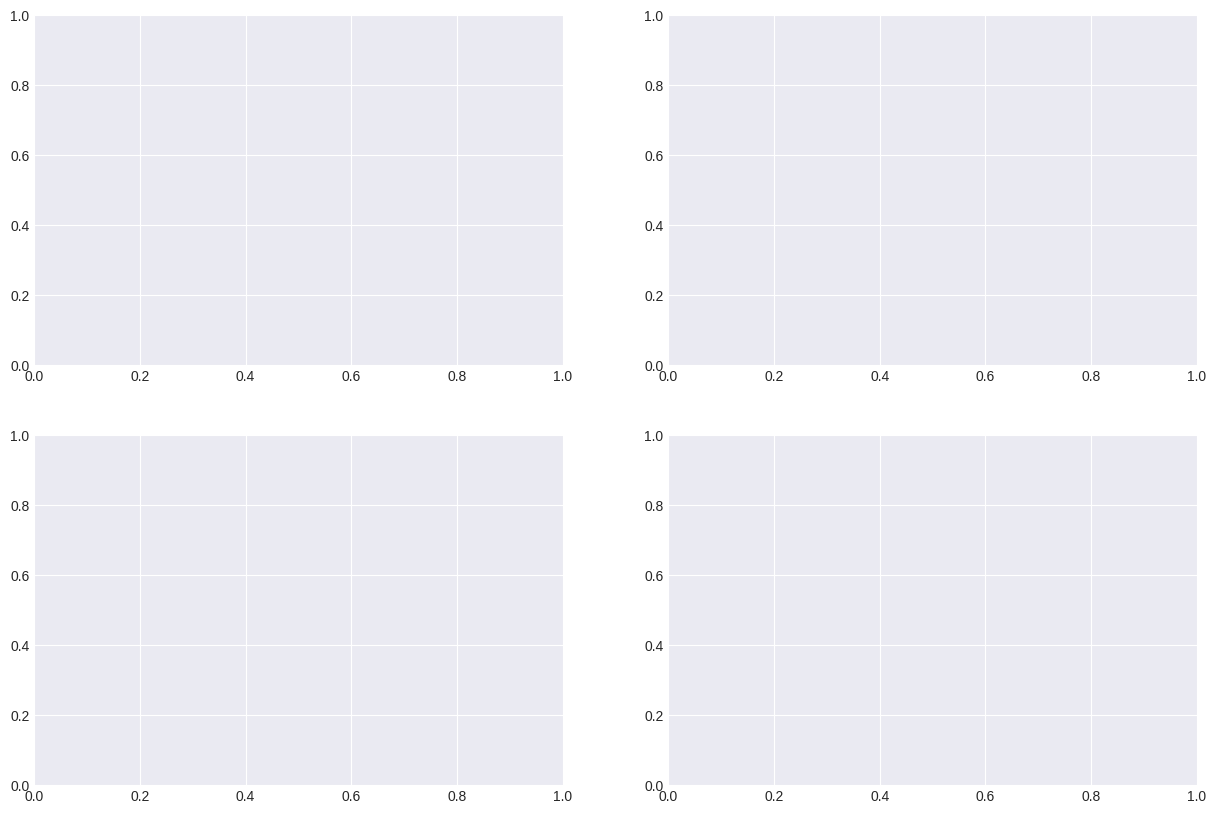

In [ ]:
print("CRIANDO VISUALIZAÇÕES")

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [ ]:
print(df.columns.tolist())  # Lista todas as colunas
print(df.head())  # Mostra as primeiras linhas

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [ ]:
# Limpe os nomes das colunas (remove espaços, coloca em minúsculas)
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# GERADOR DE GRÁFICOS COMPLETO
def gerar_todos_graficos(df, salvar=True):
    """
    Gera todos os gráficos do projeto de uma vez
    """
    import os

    # Criar pasta para gráficos se não existir
    if salvar and not os.path.exists('graficos'):
        os.makedirs('graficos')

    graficos_gerados = []

    # 1. Distribuição de preços
    plt.figure(figsize=(10, 6))
    plt.hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
    plt.title('Distribuição de Preços')
    plt.xlabel('Preço (R$)')
    plt.ylabel('Frequência')
    if salvar:
        plt.savefig('graficos/distribuicao_precos.png', dpi=300, bbox_inches='tight')
    graficos_gerados.append('distribuicao_precos.png')
    plt.show()

    # 2. Preço por categoria (top 10)
    plt.figure(figsize=(12, 6))
    top_cats = df['product_category_name'].value_counts().head(10).index
    df_top = df[df['product_category_name'].isin(top_cats)]
    medias = df_top.groupby('product_category_name')['price'].mean().sort_values()
    plt.barh(range(len(medias)), medias.values)
    plt.yticks(range(len(medias)), medias.index)
    plt.title('Preço Médio por Categoria (Top 10)')
    plt.xlabel('Preço Médio (R$)')
    if salvar:
        plt.savefig('graficos/preco_por_categoria.png', dpi=300, bbox_inches='tight')
    graficos_gerados.append('preco_por_categoria.png')
    plt.show()

    # 3. Preço vs Frete
    plt.figure(figsize=(10, 6))
    plt.scatter(df['price'].head(500), df['freight_value'].head(500), alpha=0.5)
    plt.title('Relação: Preço vs Frete')
    plt.xlabel('Preço (R$)')
    plt.ylabel('Frete (R$)')
    if salvar:
        plt.savefig('graficos/preco_vs_frete.png', dpi=300, bbox_inches='tight')
    graficos_gerados.append('preco_vs_frete.png')
    plt.show()

    # 4. Status dos pedidos
    plt.figure(figsize=(8, 8))
    status_counts = df['order_status'].value_counts()
    plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
    plt.title('Status dos Pedidos')
    if salvar:
        plt.savefig('graficos/status_pedidos.png', dpi=300, bbox_inches='tight')
    graficos_gerados.append('status_pedidos.png')
    plt.show()

    print(f" {len(graficos_gerados)} gráficos gerados com sucesso!")
    return graficos_gerados

# Uso:
# graficos = gerar_todos_graficos(df, salvar=True)

In [ ]:
print(df.columns)  # Mostra todos os nomes das colunas
print(list(df.columns))  # Em formato de lista

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [ ]:
print(df.head())  # Mostra as 5 primeiras linhas

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [ ]:
df.info()  # Mostra informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
#Coluna para análise
print("\nColunas disponíveis para análise:")
for col in df.columns:
    print(f"- {col}: {df[col].dtype}, {df[col].nunique()} valores únicos")

# Escolha uma coluna categórica (com poucos valores únicos)
# Exemplo: se tiver coluna 'brand', 'type', 'department', etc.
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() < 20]
print("\nColunas categóricas sugeridas:", categorical_cols)

# Use a primeira coluna categórica encontrada
if categorical_cols:
    category_col = categorical_cols[0]
    categories_medias = df.groupby(category_col)["price"].mean().sort_values()
    print(f"\nAnalisando por: {category_col}")


Colunas disponíveis para análise:
- customer_id: object, 99441 valores únicos
- customer_unique_id: object, 96096 valores únicos
- customer_zip_code_prefix: int64, 14994 valores únicos
- customer_city: object, 4119 valores únicos
- customer_state: object, 27 valores únicos

Colunas categóricas sugeridas: []


In [ ]:
# FEATURES
# Juntar todos os dados primeiro
df_completo = order_items.merge(orders, on='order_id').merge(products, on='product_id')

In [ ]:
# TÉCNICA 1: Features temporais
df_completo['dias_entrega'] = (pd.to_datetime(df_completo['order_delivered_customer_date']) -
                               pd.to_datetime(df_completo['order_purchase_timestamp'])).dt.days

In [ ]:
# TÉCNICA 2: Atraso na entrega
df_completo['atraso'] = (pd.to_datetime(df_completo['order_delivered_customer_date']) -
                         pd.to_datetime(df_completo['order_estimated_delivery_date'])).dt.days
df_completo['teve_atraso'] = (df_completo['atraso'] > 0).astype(int)

In [ ]:
# TÉCNICA 3: Features de produto
df_completo['preco_por_peso'] = df_completo['price'] / df_completo['product_weight_g']
df_completo['volume'] = df_completo['product_length_cm'] * df_completo['product_height_cm'] * df_completo['product_width_cm']

In [ ]:
# TÉCNICA 4: Features de período
df_completo['hora_compra'] = pd.to_datetime(df_completo['order_purchase_timestamp']).dt.hour
df_completo['fim_de_semana'] = pd.to_datetime(df_completo['order_purchase_timestamp']).dt.weekday.isin([5, 6]).astype(int)

print(f" Novas features criadas: {list(df_completo.columns[-6:])}")

 Novas features criadas: ['atraso', 'teve_atraso', 'preco_por_peso', 'volume', 'hora_compra', 'fim_de_semana']


In [ ]:
#papeline completo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Separar features
X = df_completo.drop(columns=['order_id', 'product_id', 'seller_id', 'customer_id'])

In [ ]:
# Definir colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Remover colunas com muitos valores únicos
numeric_features = [col for col in numeric_features if X[col].nunique() > 2]
categorical_features = [col for col in categorical_features if X[col].nunique() <= 20]

In [ ]:
# Criação da pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
#tratamento de outliers
def tratar_outliers_simples(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Capar os outliers
    df[coluna] = df[coluna].clip(limite_inferior, limite_superior)

    n_outliers = ((df[coluna] < limite_inferior) | (df[coluna] > limite_superior)).sum()
    print(f"  {coluna}: {n_outliers} outliers tratados")
    return df

order_items = tratar_outliers_simples(order_items, 'price')
order_items = tratar_outliers_simples(order_items, 'freight_value')

print("Outliers tratados!")

  price: 0 outliers tratados
  freight_value: 0 outliers tratados
Outliers tratados!


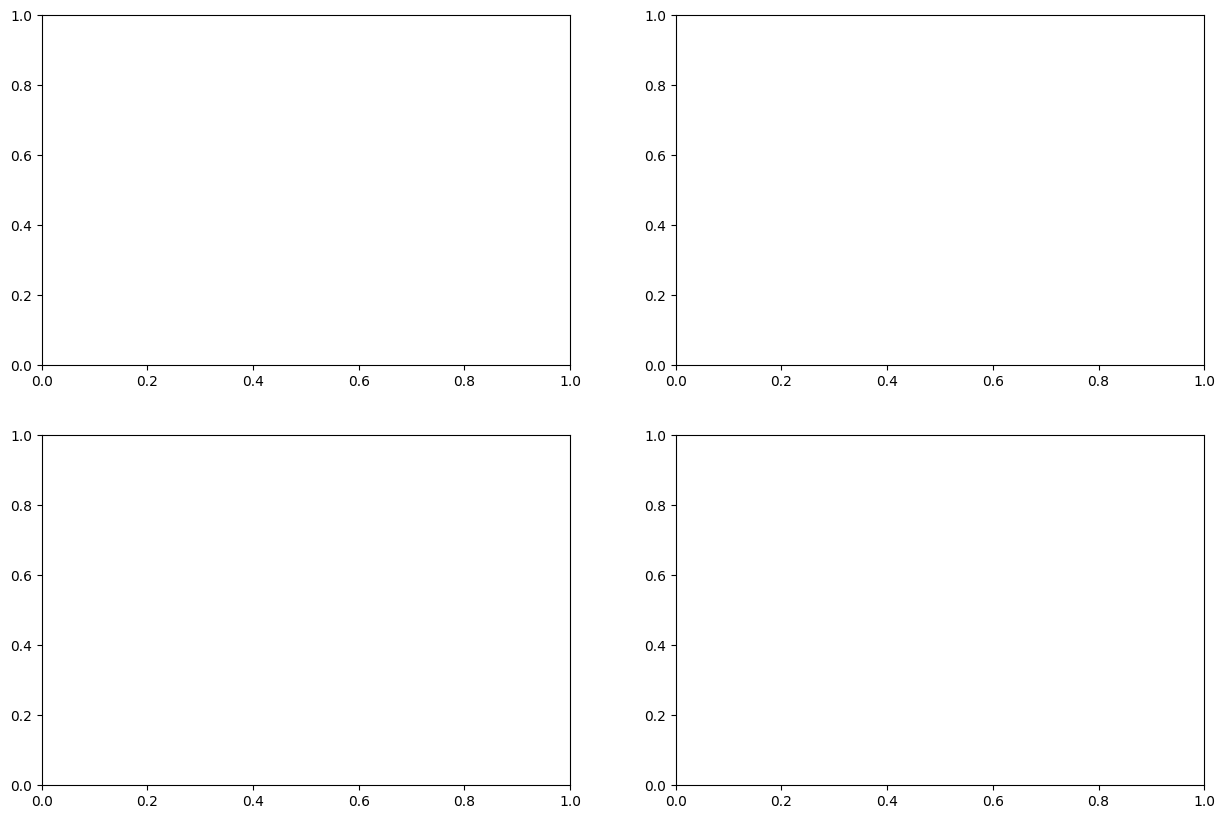

In [ ]:
# grafico
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [ ]:
# 1. Atrasos por categoria
if 'product_category_name' in df_completo.columns:
    top_categories = df_completo['product_category_name'].value_counts().head(10).index
    df_top = df_completo[df_completo['product_category_name'].isin(top_categories)]

    atrasos_por_cat = df_top.groupby('product_category_name')['teve_atraso'].mean().sort_values()

    axes[0,0].barh(range(len(atrasos_por_cat)), atrasos_por_cat.values)
    axes[0,0].set_yticks(range(len(atrasos_por_cat)))
    axes[0,0].set_yticklabels(atrasos_por_cat.index)
    axes[0,0].set_title('Taxa de Atraso por Categoria (Top 10)')
    axes[0,0].set_xlabel('Percentual de Atrasos')

In [ ]:
# 2. Distribuição de atrasos
if 'atraso' in df_completo.columns:
    axes[1,0].hist(df_completo['atraso'].dropna(), bins=50, edgecolor='black')
    axes[1,0].axvline(x=0, color='red', linestyle='--')
    axes[1,0].set_title('Distribuição de Atrasos na Entrega')
    axes[1,0].set_xlabel('Dias de Atraso (negativo = antecipado)')
    axes[1,0].set_ylabel('Frequência')

In [ ]:
# 3. Preço vs Frete com atraso
if all(col in df_completo.columns for col in ['price', 'freight_value', 'teve_atraso']):
    scatter = axes[1,1].scatter(df_completo['price'].head(500),
                               df_completo['freight_value'].head(500),
                               c=df_completo['teve_atraso'].head(500),
                               alpha=0.6, cmap='coolwarm')
    axes[1,1].set_title('Preço vs Frete (cor = atraso)')
    axes[1,1].set_xlabel('Preço (R$)')
    axes[1,1].set_ylabel('Frete (R$)')
    plt.colorbar(scatter, ax=axes[1,1], label='Teve Atraso')

plt.tight_layout()
plt.savefig('analise_final.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-1769240609.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1000 with 5 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, ax=axes[1,1], label='Teve Atraso')


<Figure size 640x480 with 0 Axes>

In [ ]:
# CÓDIGO DE DIAGNÓSTICO
import pandas as pd

# 1. Mostrar todas as colunas disponíveis
print("COLUNAS DISPONÍVEIS:")
print(df.columns.tolist())

# 2. Mostrar primeiras linhas
print("\n PRIMEIRAS 3 LINHAS:")
print(df.head(3))

# 3. Procurar colunas relacionadas a preço
print("\n PROCURANDO COLUNAS DE PREÇO:")
price_cols = [col for col in df.columns if 'price' in str(col).lower() or 'preço' in str(col).lower() or 'valor' in str(col).lower() or 'value' in str(col).lower()]
print("Colunas de preço encontradas:", price_cols)

# 4. Procurar colunas relacionadas a categoria
print("\n PROCURANDO COLUNAS DE CATEGORIA:")
category_cols = [col for col in df.columns if 'categor' in str(col).lower() or 'category' in str(col).lower() or 'type' in str(col).lower() or 'tipo' in str(col).lower()]
print("Colunas de categoria encontradas:", category_cols)


if price_cols:
    # Usa a primeira coluna de preço encontrada
    price_column = price_cols[0]
    print(f"\nUsando coluna de preço: '{price_column}'")

    if category_cols:
        # Usa a primeira coluna de categoria encontrada
        category_column = category_cols[0]
        print(f"Usando coluna de categoria: '{category_column}'")

        # Agrupa com os nomes CORRETOS
        categories_medias = df.groupby(category_column)[price_column].mean().sort_values()

        # Cria o gráfico CORRETO
        import matplotlib.pyplot as plt

        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        axes[0,1].bar(range(len(categories_medias)), categories_medias.values, color='lightcoral')
        axes[0,1].set_title("Preço Médio por Categoria")
        axes[0,1].set_xlabel("Categorias")
        axes[0,1].set_ylabel(f"Média de {price_column}")
        axes[0,1].set_xticks(range(len(categories_medias)))
        axes[0,1].set_xticklabels(categories_medias.index, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Nenhuma coluna de categoria encontrada!")
else:
    print("Nenhuma coluna de preço encontrada!")

COLUNAS DISPONÍVEIS:
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

 PRIMEIRAS 3 LINHAS:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  

 PROCURANDO COLUNAS DE PREÇO:
Colunas de preço encontradas: []

 PROCURANDO COLUNAS DE CATEGORIA:
Colunas de categoria encontradas: []
Nenhuma coluna de preço encontrada!
